In [87]:
import numpy
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [88]:
# define a polynomial
def polynomial(x, arr):
    v = 0;
    for i in range(0, len(arr)):
        v += arr[i]*x**i
    return v

In [89]:
# Let's try the polynomial
polynomial(5, [5,21,22])

660

In [90]:
# this is our expected data
data = [[-10,5], [-5, 10], [0,0], [5,10], [10,5]]
data

[[-10, 5], [-5, 10], [0, 0], [5, 10], [10, 5]]

In [91]:
# we want to minimize the following error function (which depends on the polynomial)
def errorfun(arr, *args):
    v=0
    for i in range(0,len(data)):
        v += ( polynomial(data[i][0],arr) - data[i][1])**2
    return v

In [117]:
minim = minimize(errorfun, [1,1,5], 'BFGS')
minim

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 70.00000000000131
        x: [ 6.000e+00 -1.315e-08 -1.009e-08]
      nit: 10
      jac: [-1.907e-06 -2.861e-06  3.815e-06]
 hess_inv: [[ 4.261e-02 -1.661e-03 -5.127e-04]
            [-1.661e-03  1.986e-03  1.945e-05]
            [-5.127e-04  1.945e-05  2.971e-05]]
     nfev: 96
     njev: 24

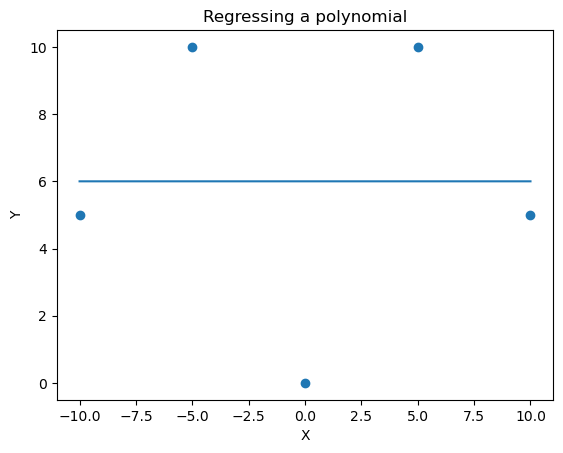

In [119]:
approximation = minim.x
plt.scatter(list(map(lambda x: x[0], data)), list(map(lambda x: x[1], data)), label='Data')
linspace = numpy.linspace(-10,10, 10000)
plt.plot(linspace, list(map(lambda x: polynomial(x, approximation), linspace)), label='Regressed polynomial')
plt.xlabel('X'); plt.ylabel('Y'); plt.title('Regressing a polynomial')
plt.show()